# Sampling

Main author: Alison Peebles Madigan.

## Population Inference

The DC mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine what proportion of the population of DC owns a car.

In order for us to make any determinations about a population, we must first get information about it.

Because it's impractical to ever usually get data about *everyone* in a population, we must take a sample.



Our sample should be:

* Randomly selected- every item should have an *equal* chance of being selected
* Representative of our population

![pop](./sample_pop.png)

**Random sampling is not easy to do. Let's look at an example:**

Imagine you are trying to determine what proportion of DC metro area people own a car

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car



When we gather a sample, we are trying to minimize the bias of our sample while also minimizing our cost.

##### Population v Sample Terminology
Measurable characteristics of populations are called *parameters*

Measurable characteristics of a sample are called *statistics*

![imgsample](./sample_stats.png)

## Central Limit Theorem

If we take repeated samples of a population, the sampling distribution of sample means will approximate to a normal distribution! 

## $E(\bar{x_{n}}) = \mu$

as n --> "large"

[good D3 example](https://seeing-theory.brown.edu/probability-distributions/index.html)

[good video demonstration](https://www.youtube.com/watch?v=jvoxEYmQHNM)


Let's look at an example taken from the ubiquitous Iris dataset. This histogram represents the distributions of sepal length:


![probgif](./probability-basics.gif)

### An Example
A bicycle advocacy group has come to us to see if it would make sense to increase the length of time users of Capital Bike Share have to ride on their bikes before they have to return them. Let's analyze a collection of Capital Bike Share data to determine if we should lengthen the time people have with their bikes.

Go [here](https://s3.amazonaws.com/capitalbikeshare-data/index.html) to download the latest file: DC bikeshare data from 201905!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('/Users/gdamico/Downloads/201905-capitalbikeshare-tripdata.csv')

In [4]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,653,2019-05-01 00:00:02,2019-05-01 00:10:55,31127,22nd & H St NW,31202,14th & R St NW,W00233,Member
1,297,2019-05-01 00:00:13,2019-05-01 00:05:11,31641,2nd St & Massachusetts Ave NE,31603,1st & M St NE,W00555,Member
2,129,2019-05-01 00:00:36,2019-05-01 00:02:46,31255,24th & N St NW,31237,25th St & Pennsylvania Ave NW,W23383,Member
3,1119,2019-05-01 00:01:08,2019-05-01 00:19:48,31655,New Jersey Ave & F St NW,31244,4th & E St SW,W20337,Member
4,533,2019-05-01 00:01:20,2019-05-01 00:10:13,31203,14th & Rhode Island Ave NW,31223,Convention Center / 7th & M St NW,W23707,Member


In [5]:
trip_durations = df['Duration'] / 60
trip_durations = trip_durations[trip_durations < 2 * 60]

#### Get population statistics

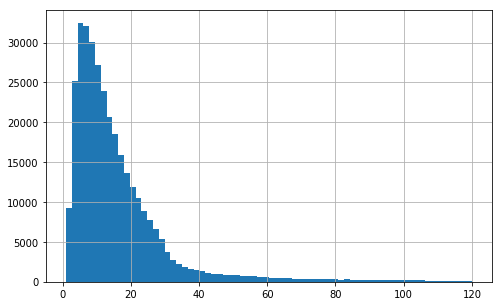

In [6]:
trip_durations.hist(figsize = (8, 5), bins=70);

Bike trip lengths are NOT normally distributed!

In [7]:
trip_durations.mode()

0    5.766667
dtype: float64

In [9]:
pop_mean = trip_durations.mean()
pop_std = trip_durations.std()
print('pop_mean is {} \npop_std is {}'.format(pop_mean, pop_std))

pop_mean is 16.18727562660655 
pop_std is 15.392082876451711


#### When we take multiple samples from the distribution, and plot the means of each sample, the shape of the curve shifts.

### Let's confirm with code ourselves!

In [10]:
def one_sample_mean(population):
    sample = np.random.choice(population, size=200, replace=True)
    return sample.mean()

In [11]:
one_sample_mean(trip_durations)

16.238249999999997

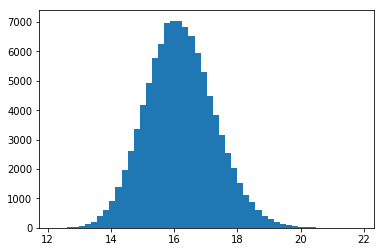

In [15]:
d = [one_sample_mean(trip_durations) for _ in range(100000)]
plt.hist(d, bins=50);

In [16]:
import seaborn as sns


def central_limit_theorem_plotter(distribution, sample_size, num_samples):
    sample_means = np.zeros(num_samples)
    for idx, num in enumerate(range(num_samples)):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        sample_means[idx] = sample.mean()
    sns.distplot(sample_means, bins=80, kde=True)
    title = 'Sample Distribution n = {} and number of samples = {}, std error = {}'.format(sample_size, num_samples, pop_std/num_samples)
    print('mean = {}'.format(sample_means.mean()))
    plt.title(title)

mean = 16.189821846666668


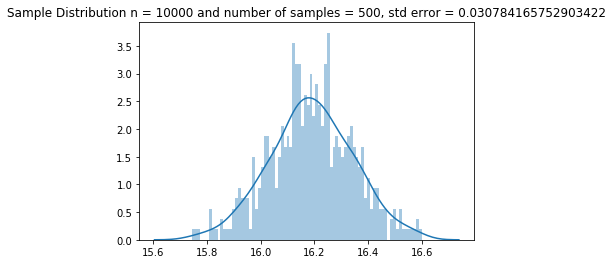

In [18]:
central_limit_theorem_plotter(trip_durations, 10000, 500)

mean = 16.164773333333333


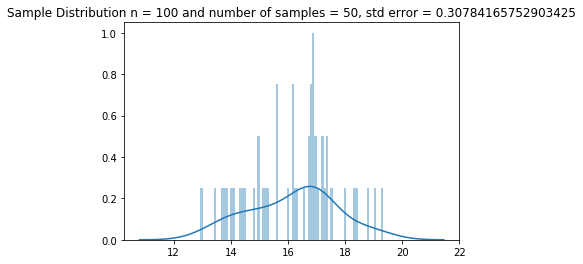

In [19]:
central_limit_theorem_plotter(trip_durations, 100, 50)

* What happens as we increase the sample size?
* How does the height of the distribution change? Why does it change?

https://www.kaggle.com/tentotheminus9/central-limit-theorem-animation

### Show with exponential

In [20]:
exponential =np.random.exponential(scale= 1, size=1000)

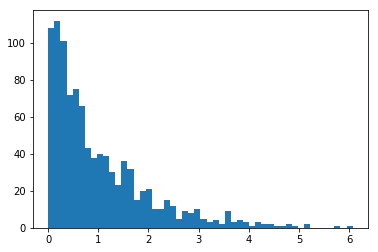

In [21]:
plt.hist(exponential, bins=50);

mean = 1.0073640939221356


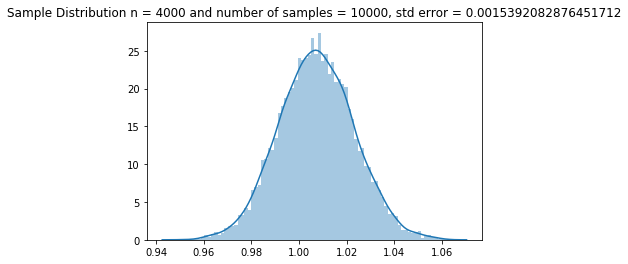

In [22]:
central_limit_theorem_plotter(exponential, 4000, 10000)

### Standard Error of the Mean

The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for the fact that in order to make our estimate of the $\mu$ value possible. Let's break it down:

**Population sigma**
### $\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate for it by used the sample standard deviation.

### $\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

**Sample size impact on standard error of mean**<br>

How should sample size influence standard error of the mean?

It will get *smaller* as sample size *increases*

![error](./img/diminishing_error.png)
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.
